In [1]:
import pandas as pd
import numpy as np
# import cv2
import os
from matplotlib import pyplot as plt

In [2]:
masks_csv = pd.read_csv("/home/data_shares/purrlab/physionet.org/files/chexmask-cxr-segmentation-data/0.2/OriginalResolution/CheXpert.csv", index_col = False)
# for i in train_data_csv.columns:
#     print(i)

In [4]:
upd_train_data = pd.read_csv('updated_train_data.csv')

In [6]:
masks_csv

,Path,Dice RCA (Mean),Dice RCA (Max),Landmarks,Left Lung,Right Lung,Heart,Height,Width
0,train/patient40255/study2/view1_frontal.jpg,0.864037,0.906135,[[ 950 268]\n [ 881 279]\n [ 806 323]\n [ 7...,830109 9 832934 26 835759 44 838584 61 841408 ...,758852 5 761674 14 764496 24 767318 33 770139 ...,2586143 10 2588952 31 2591760 53 2594510 132 2...,2320,2828
1,train/patient40255/study1/view1_frontal.jpg,0.881892,0.931429,[[ 983 285]\n [ 887 304]\n [ 784 367]\n [ 6...,728454 10 731266 29 734077 50 736888 70 739700...,806962 5 809785 15 812608 25 815431 35 818254 ...,2976451 20 2976600 14 2979267 59 2979403 41 29...,2320,2828
2,train/patient40255/study3/view1_frontal.jpg,0.812861,0.835841,[[1323 365]\n [1234 376]\n [1141 428]\n [10...,1025622 6 1028448 16 1031274 26 1034099 37 103...,1033540 6 1036360 17 1039180 29 1042000 40 104...,2962494 15 2965312 44 2968129 74 2970946 103 2...,2320,2828
3,train/patient34954/study2/view1_frontal.jpg,0.846300,0.866827,[[1118 332]\n [1043 346]\n [ 956 404]\n [ 8...,939770 5 942724 14 945677 25 948631 34 951585 ...,983505 4 986458 12 989412 19 992366 26 995319 ...,3581832 78 3584787 107 3587743 135 3590699 160...,2720,2959
4,train/patient34954/study1/view1_frontal.jpg,0.857480,0.887031,[[1199 256]\n [1104 279]\n [1003 349]\n [ 8...,700236 4 703190 12 706144 21 709098 29 712052 ...,758702 4 761657 12 764612 20 767567 28 770522 ...,3546564 20 3549493 58 3552421 97 3555361 125 3...,2800,2959
...,...,...,...,...,...,...,...,...,...
187820,valid/patient64645/study1/view1_frontal.jpg,0.861537,0.887319,[[1342 359]\n [1244 369]\n [1139 428]\n [10...,1151765 7 1155107 21 1158448 36 1161790 49 116...,1204707 7 1208049 21 1211391 35 1214733 49 121...,3946968 7 3950314 21 3953659 35 3957005 49 396...,2800,3352
187821,valid/patient64569/study1/view1_frontal.jpg,0.834703,0.895246,[[1195 451]\n [1078 451]\n [ 958 508]\n [ 8...,1859430 6 1862836 17 1866241 30 1869647 41 187...,1538086 120 1541492 125 1544898 130 1548304 13...,5011309 7 5014711 20 5018113 33 5021514 48 502...,2800,3408
187822,valid/patient64717/study1/view1_frontal.jpg,0.810635,0.844322,[[ 928 196]\n [ 845 207]\n [ 757 251]\n [ 6...,643511 22 646337 64 649163 87 651989 91 654814...,555214 5 558034 17 560855 27 563675 39 566496 ...,2891402 18 2894202 52 2897001 87 2899812 110 2...,2320,2828
187823,valid/patient64636/study1/view1_frontal.jpg,0.856164,0.922707,[[ 721 180]\n [ 638 215]\n [ 555 285]\n [ 4...,134369 7 137193 21 140017 35 142841 49 145665 ...,509761 9 512587 25 515413 42 518238 59 521064 ...,2408120 6 2410941 17 2413762 28 2416583 39 241...,2320,2828


Original image size: (390, 320)
Resizing mask from (2828, 2320) to (390, 320)


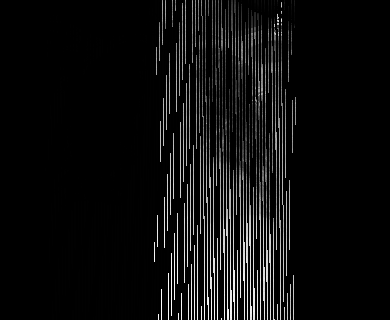

In [18]:
from PIL import Image, ImageOps
import numpy as np

def rle_decode(mask_rle, shape):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0::2], s[1::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape, order='F')  # Order 'F' is used as RLE is often column-major order

row = masks_csv.iloc[0]
# Load the corresponding image
image_path = '/home/data_shares/purrlab/CheXpert/CheXpert-v1.0-small/' + row['Path']
original_image = Image.open(image_path).convert('L')

# Print original image size
print("Original image size:", original_image.size)

# Decode the RLE masks using provided dimensions
mask_height = row['Height']
mask_width = row['Width']
left_lung_mask = rle_decode(row['Left Lung'], (mask_height, mask_width))
right_lung_mask = rle_decode(row['Right Lung'], (mask_height, mask_width))
heart_mask = rle_decode(row['Heart'], (mask_height, mask_width))

# Convert numpy array to PIL image and resize if necessary
mask_image = Image.fromarray((left_lung_mask | right_lung_mask | heart_mask * 255).astype(np.uint8))
if mask_image.size != original_image.size:
    print("Resizing mask from", mask_image.size, "to", original_image.size)
    mask_image = mask_image.resize(original_image.size, Image.NEAREST)

# Composite masked image
final_image = Image.composite(original_image, Image.new('L', original_image.size), mask_image)
final_image.show()  # Show the final image with the lungs and heart highlighted

Resizing mask from (2320, 2828) to (390, 320)


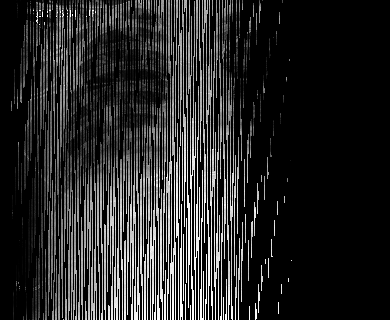

In [25]:
import pandas as pd
from PIL import Image, ImageOps
import numpy as np

def rle_decode(mask_rle, shape):
    """
    Converts a run-length encoded string into a binary mask array.
    
    Args:
        mask_rle (str): Run-length encoded string.
        shape (tuple): The shape of the array to be returned (height, width).

    Returns:
        numpy array: Binary mask array.
    """
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0::2], s[1::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape, order='F')  # Ensure correct order

row = masks_csv.iloc[10001]
# Load the image and mask data
image_path = '/home/data_shares/purrlab/CheXpert/CheXpert-v1.0-small/' + row['Path']  # Adjust as necessary
original_image = Image.open(image_path).convert('L')  # Ensure image is in grayscale

# Decode RLE masks using shape from metadata (ensure this matches your dataset!)
mask_height, mask_width = row['Height'], row['Width']
left_lung_mask = rle_decode(row['Left Lung'], (mask_height, mask_width))
right_lung_mask = rle_decode(row['Right Lung'], (mask_height, mask_width))
combined_mask = left_lung_mask | right_lung_mask

# Ensure the mask matches the size of the original image
if (mask_height, mask_width) != original_image.size:
    print(f"Resizing mask from ({mask_height}, {mask_width}) to {original_image.size}")
    combined_mask = np.array(Image.fromarray(combined_mask).resize(original_image.size, Image.NEAREST))

# Create a mask image (PIL) from the numpy array
mask_image = Image.fromarray(combined_mask * 255).convert('L')

# Apply the mask: keep the lungs, blacken out the rest
final_image = Image.composite(original_image, Image.new('L', original_image.size, 0), mask_image)

# Save or show the result
final_image.show()

In [ ]:
# FOR ASSYMETRY ONCE WE HAVE THE MASKS ON TOP OF THE IMAGES

import cv2
import numpy as np

def lung_symmetry(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Threshold the image to make sure it's binary
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Assuming the two largest contours are the lungs
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:2]
    
    # Get bounding rectangles for each contour
    rects = [cv2.boundingRect(cnt) for cnt in contours]
    
    # Sort rectangles by x coordinate (left to right)
    rects.sort(key=lambda x: x[0])
    
    # Assuming the left lung is the first rectangle and the right lung is the second
    left_lung_rect, right_lung_rect = rects
    
    # Extract right lung, mirror it
    x, y, w, h = right_lung_rect
    right_lung = binary_image[y:y+h, x:x+w]
    mirrored_right_lung = cv2.flip(right_lung, 1)
    
    # Overlay mirrored right lung onto the left lung region
    x, y, w, h = left_lung_rect
    overlay_region = binary_image[y:y+h, x:x+w]
    
    # Resize mirrored image to match the overlay region if necessary
    if mirrored_right_lung.shape != overlay_region.shape:
        mirrored_right_lung = cv2.resize(mirrored_right_lung, (w, h), interpolation=cv2.INTER_AREA)
    
    # Calculate non-overlapping pixels
    non_overlap = cv2.bitwise_xor(overlay_region, mirrored_right_lung)
    non_overlap_count = cv2.countNonZero(non_overlap)
    
    # Normalize the non-overlapping count by the area of the lung overlay region
    normalized_non_overlap = non_overlap_count / (w * h)
    
    return normalized_non_overlap

# Usage
normalized_count = lung_symmetry('path_to_your_lung_image.jpg')
print(f'Normalized non-overlapping pixel count: {normalized_count:.4f}')
cv2.waitKey(0)
cv2.destroyAllWindows()
